
importing necessary libraries for the analysis

In [42]:
import seaborn as sns
import requests
import numpy as np
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
item_versionlist=requests.get('https://ddragon.leagueoflegends.com/api/versions.json')
item_req=requests.get('http://ddragon.leagueoflegends.com/cdn/{}/data/en_US/item.json'.format(item_versionlist.json()[0]))



In this block make sure that you change the APIkey to your custom key from the LOL API main site

In [5]:
championName='reydeloscriollos'
apikey='RGAPI-d9c4c104-30bf-47d1-98cf-792de24ace6a'
myresp= requests.get('https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{}?api_key={}'.format(championName,apikey))


Run this code after running the first scrip to get the puuid to then put in the next line of code, if you get a 403 error, 
you have the wrong key or it is out of dat(it needs to be refreshed on the site every 24 hours)


In [6]:
myresp.json()

{'id': '8_ogx0Ro8pJixXDSZLKaqgtH0XSRuC5jndwdchQ9odzcTqQ',
 'accountId': '_5IqpvWSbxIpp5xb68Ea3Ip5NlutvRklZBI5xUbV0vO3pA',
 'puuid': 'kaRj0TF9dJQpxiAXS9DukCLbfuiT9aAVSDbSkm329KWSkqzi87iE6HlEBuUdRMjcpt-XcFy0yQs3kw',
 'name': 'reydeloscriollos',
 'profileIconId': 4982,
 'revisionDate': 1622690167655,
 'summonerLevel': 201}

run this code next after you obtain the match code from the block above


In [7]:
apimatch='kaRj0TF9dJQpxiAXS9DukCLbfuiT9aAVSDbSkm329KWSkqzi87iE6HlEBuUdRMjcpt-XcFy0yQs3kw'
sndresp=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?start=0&count=100&api_key={}'.format(apimatch,apikey))

listnew=[]
itera=500
while itera>0:
    response=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{}/ids?start={}&count=100&api_key={}'.format(apimatch,itera,apikey))
    
    listnew.extend(response.json())
    itera-= 100

check that you are getting a 200 success response

In [8]:

sndresp

<Response [200]>

This block is grabing the each match and matching all of match numbers to the match info api



In [9]:
# pre data definitions
test_match=listnew
dictionaryOfPlayers={}
counter=0

# note that the LOL API has a request limit that you can not make more that 20 request in 2 minutes
#so you have to use the time class to mute the code for 3 seconds
for item in test_match:
    
    time.sleep(3)
    my_match_in_for=requests.get('https://americas.api.riotgames.com/lol/match/v5/matches/{}?api_key={}'.format(item,apikey))
    vari=my_match_in_for.json()
    if 'status' not in vari:
        dictionaryOfPlayers[counter]= vari['info']['participants']
    else:
        continue
    counter+=1

In [10]:
my_match_in_for

<Response [200]>

In [17]:
# This row was not useful for any of the analysis that need to be done
for player in dictionaryOfPlayers[0]:
    print(player)
    del player['perks']

{'assists': 5, 'baronKills': 0, 'bountyLevel': 0, 'champExperience': 11798, 'champLevel': 14, 'championId': 37225015, 'championName': 'Shen', 'championTransform': 0, 'consumablesPurchased': 3, 'damageDealtToObjectives': 0, 'damageDealtToTurrets': 0, 'damageSelfMitigated': 31945, 'deaths': 4, 'detectorWardsPlaced': 0, 'doubleKills': 0, 'dragonKills': 0, 'firstBloodAssist': False, 'firstBloodKill': False, 'firstTowerAssist': False, 'firstTowerKill': False, 'gameEndedInEarlySurrender': False, 'gameEndedInSurrender': False, 'goldEarned': 7132, 'goldSpent': 5900, 'individualPosition': 'TOP', 'inhibitorKills': 0, 'item0': 1054, 'item1': 2031, 'item2': 3047, 'item3': 2055, 'item4': 3068, 'item5': 3076, 'item6': 3340, 'itemsPurchased': 15, 'killingSprees': 0, 'kills': 1, 'lane': 'JUNGLE', 'largestCriticalStrike': 0, 'largestKillingSpree': 0, 'largestMultiKill': 1, 'longestTimeSpentLiving': 904, 'magicDamageDealt': 24976, 'magicDamageDealtToChampions': 3864, 'magicDamageTaken': 5008, 'neutralMi

KeyError: 'perks'

In [16]:
# you should get an error message, just check that it was deleted
del df_pd['perks']

KeyError: 'perks'

appending the gathered data from the API call and appending them into one pandas Dataframe

In [14]:
list_of_frames=[]
for dataframe2 in  dictionaryOfPlayers:
    list_of_frames.append(pd.DataFrame(dictionaryOfPlayers[dataframe2]))
    
    
df_pd=pd.concat(list_of_frames,ignore_index=True)

In [13]:
df_pd.info
games=df_pd.loc[df_pd['summonerName']==championName]
games

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,5,0,2,13748,15,37683774,Seraphine,0,4,5516,...,15,0,0,8,True,NaN,NaN,NaN,NaN,NaN
17,12,0,1,15414,16,37683774,Senna,0,2,7847,...,8,0,0,5,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,7,0,2,11386,13,37683774,Senna,0,5,7092,...,11,0,0,7,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
37,9,0,7,19046,18,37683774,Seraphine,0,2,16211,...,23,0,2,12,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
47,20,0,3,25709,18,37683774,Senna,0,4,10943,...,25,0,2,14,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,5,0,0,11115,13,19,Warwick,0,0,15427,...,17,0,3,8,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",0.0,2.0,1.0,10.0
4932,4,1,0,13632,15,86,Garen,0,2,15562,...,31,1,4,11,True,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",3831.0,0.0,0.0,0.0
4947,2,0,4,9552,12,235,Senna,0,2,1622,...,11,0,1,6,True,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",1622.0,0.0,0.0,1.0
4952,0,0,0,10677,13,235,Senna,0,2,407,...,8,0,0,6,False,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",407.0,1.0,1.0,7.0


Save the main data file so you can easily load at a later time

In [20]:
df_pd.to_json(r'C:\Users\amird\mydata.json')

ONLY Run this when you want to recoup data and not run the long code

In [21]:
# with open(r'C:\Users\amird\mydata.json') as f:
#   data = json.load(f)
# df_pd=pd.DataFrame(data)

changing the Items column so that we can match it to the Items API through Data dragon 


In [22]:
games["item0"]=games["item0"].astype(str)
games["item2"]=games["item2"].astype(str)
games["item3"]=games["item3"].astype(str)
games["item4"]=games["item4"].astype(str)
games["item5"]=games["item5"].astype(str)
games["item6"]=games["item6"].astype(str)
games["win"]=games['win'].map(lambda x: 'win' if x==True else 'loss')


In [24]:
file=item_req.json()

In [25]:
dictionaryOfItems={}

for itemnum in file['data']:
    
    dictionaryOfItems[itemnum]=file['data'][itemnum]['name']


In [26]:
#map the dictionary of items to the matching codes for the items

games["item0"]=games["item0"].map(dictionaryOfItems)
games["item1"]=games["item1"].map(dictionaryOfItems)
games["item2"]=games["item2"].map(dictionaryOfItems)
games["item3"]=games["item3"].map(dictionaryOfItems)
games["item4"]=games["item4"].map(dictionaryOfItems)
games["item5"]=games["item5"].map(dictionaryOfItems)
games["item6"]=games["item6"].map(dictionaryOfItems)


Simple spread of the data and the win loss ratio for all of the champions I played
and there win loss ratio  is calculated in the next block just converting it to percents to make it a bit easier to read.


In [27]:
new=games[['championName','win']]
games.groupby(['championName','win']).count()

assists  baronKills  bountyLevel  champExperience  \
championName win                                                       
Ahri         win         1           1            1                1   
Bard         loss        1           1            1                1   
Caitlyn      loss        2           2            2                2   
             win         4           4            4                4   
Cassiopeia   loss        2           2            2                2   
...                    ...         ...          ...              ...   
Xayah        win         1           1            1                1   
Yasuo        loss        1           1            1                1   
             win         4           4            4                4   
Yone         loss       10          10           10               10   
             win         9           9            9                9   

                   champLevel  championId  championTransform  \
championName win                                               
Ahri         win            1           1                  1   
Bard         loss           1           1                  1   
Caitlyn      loss           2           2                  2   
             win            4           4                  4   
Cassiopeia   loss           2           2                  2   
...                       ...         ...                ...   
Xayah        win            1           1                  1   
Yasuo        loss           1           1                  1   
             win            4           4                  4   
Yone         loss          10          10                 10   
             win            9           9                  9   

                   consumablesPurchased  damageDealtToObjectives  \
championName win                                                   
Ahri         win                      1                        1   
Bard         loss                     1                        1   
Caitlyn      loss                     2                        2   
             win                      4                        4   
Cassiopeia   loss                     2                        2   
...                                 ...                      ...   
Xayah        win                      1                        1   
Yasuo        loss                     1                        1   
             win                      4                        4   
Yone         loss                    10                       10   
             win                      9                        9   

                   damageDealtToTurrets  ...  unrealKills  visionScore  \
championName win                         ...                             
Ahri         win                      1  ...            1            1   
Bard         loss                     1  ...            1            1   
Caitlyn      loss                     2  ...            2            2   
             win                      4  ...            4            4   
Cassiopeia   loss                     2  ...            2            2   
...                                 ...  ...          ...          ...   
Xayah        win                      1  ...            1            1   
Yasuo        loss                     1  ...            1            1   
             win                      4  ...            4            4   
Yone         loss                    10  ...           10           10   
             win                      9  ...            9            9   

                   visionWardsBoughtInGame  wardsKilled  wardsPlaced  perks  \
championName win                                                              
Ahri         win                         1            1            1      1   
Bard         loss                        1            1            1      1   
Caitlyn      loss                        2            2            2      2   
      

In [28]:
vram=games.groupby(['championName','win']).agg({'assists':'sum'})
vram2=vram.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
highestWinRate=vram2.loc[(vram2['win']=='win')&(vram2['assists']> 50.0)]

highestWinRate

,championName,win,assists
0,Ahri,win,100.000000
3,Caitlyn,win,83.636364
5,Draven,win,100.000000
7,Garen,win,88.888889
11,Hecarim,win,100.000000
18,Karthus,win,100.000000
24,Lucian,win,61.635220
28,Malzahar,win,57.031250
30,MasterYi,win,65.217391
34,Nasus,win,52.631579


In [29]:
listChamp=list(highestWinRate['championName'])
games[(games['championName'].isin(listChamp))]


,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,5,0,2,13748,15,37683774,Seraphine,0,4,5516,...,15,0,0,8,win,NaN,NaN,NaN,NaN,NaN
17,12,0,1,15414,16,37683774,Senna,0,2,7847,...,8,0,0,5,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,7,0,2,11386,13,37683774,Senna,0,5,7092,...,11,0,0,7,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
37,9,0,7,19046,18,37683774,Seraphine,0,2,16211,...,23,0,2,12,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
47,20,0,3,25709,18,37683774,Senna,0,4,10943,...,25,0,2,14,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,6,0,0,9001,12,75,Nasus,0,0,4377,...,13,0,0,8,loss,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",0.0,2.0,1.0,11.0
4932,4,1,0,13632,15,86,Garen,0,2,15562,...,31,1,4,11,win,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",3831.0,0.0,0.0,0.0
4947,2,0,4,9552,12,235,Senna,0,2,1622,...,11,0,1,6,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",1622.0,0.0,0.0,1.0
4952,0,0,0,10677,13,235,Senna,0,2,407,...,8,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",407.0,1.0,1.0,7.0


In [30]:
var=games.groupby('championName').count().reset_index()
playedmorethanten=var.loc[var['assists']>5,['championName']]

playedmorethanten=list(playedmorethanten['championName'])
playedmorethanten

['Caitlyn',
 'Gwen',
 'Lucian',
 'Malzahar',
 'Nasus',
 'Samira',
 'Senna',
 'Seraphine',
 'Varus',
 'Warwick',
 'Yone']

In [32]:
NEXTdf=games[(games['championName'].isin(listChamp)) & (games['championName'].isin(playedmorethanten))]
NEXTdf

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToObjectives,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
7,5,0,2,13748,15,37683774,Seraphine,0,4,5516,...,15,0,0,8,win,NaN,NaN,NaN,NaN,NaN
17,12,0,1,15414,16,37683774,Senna,0,2,7847,...,8,0,0,5,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
27,7,0,2,11386,13,37683774,Senna,0,5,7092,...,11,0,0,7,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
37,9,0,7,19046,18,37683774,Seraphine,0,2,16211,...,23,0,2,12,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
47,20,0,3,25709,18,37683774,Senna,0,4,10943,...,25,0,2,14,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,8,0,0,12059,14,235,Senna,0,2,2245,...,11,0,0,7,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",1261.0,2.0,1.0,10.0
4912,6,0,0,9001,12,75,Nasus,0,0,4377,...,13,0,0,8,loss,"{'statPerks': {'defense': 5003, 'flex': 5008, ...",0.0,2.0,1.0,11.0
4947,2,0,4,9552,12,235,Senna,0,2,1622,...,11,0,1,6,win,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",1622.0,0.0,0.0,1.0
4952,0,0,0,10677,13,235,Senna,0,2,407,...,8,0,0,6,loss,"{'statPerks': {'defense': 5002, 'flex': 5008, ...",407.0,1.0,1.0,7.0


just wanted to see the best champs by percentage i have filtering it out


In [34]:
vram3=NEXTdf.groupby(['championName','win']).agg({'assists':'sum'})
vram4=vram3.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
highestWinRate2=vram4.loc[(vram4['win']=='win')&(vram4['assists']> 50.0)]

highestWinRate2

,championName,win,assists
1,Caitlyn,win,83.636364
3,Lucian,win,61.635220
5,Malzahar,win,57.031250
7,Nasus,win,52.631579
9,Samira,win,73.417722
11,Senna,win,60.811456
13,Seraphine,win,67.029973
15,Varus,win,84.615385
17,Yone,win,69.841270


this is just a boxplot of the win loss ratio measuring total damage.  I think that this can be usefull in a platform for analytics 
 this would be very helpful for players that are trying to gain more knowlege about their play style specified by champ
I used total damage and deaths as examples but I believe a chart like this matched on metrics that relate could be useful
to players
exp when i play lucian my damge ratio fall in line with wins and losses, high damage with wins lower with losses
but I can see with malzahar I have a High overall damage output.

''

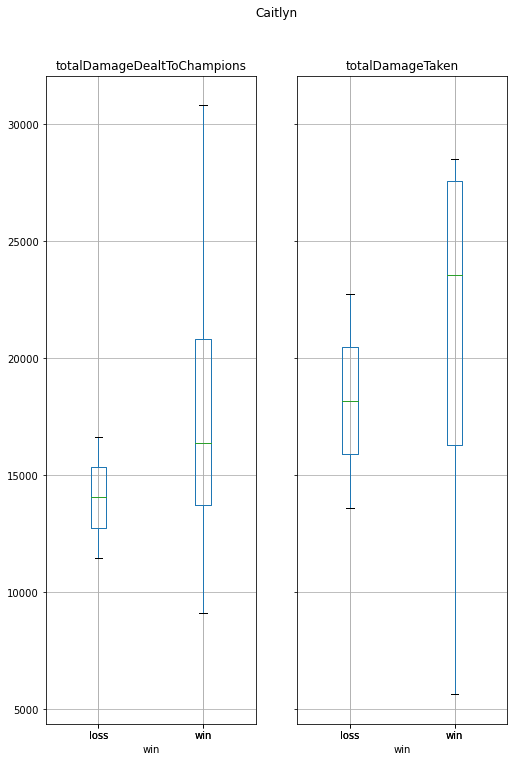

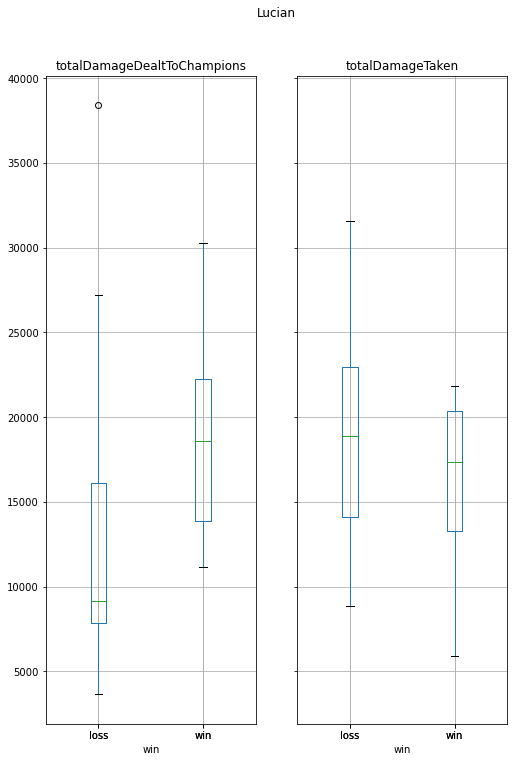

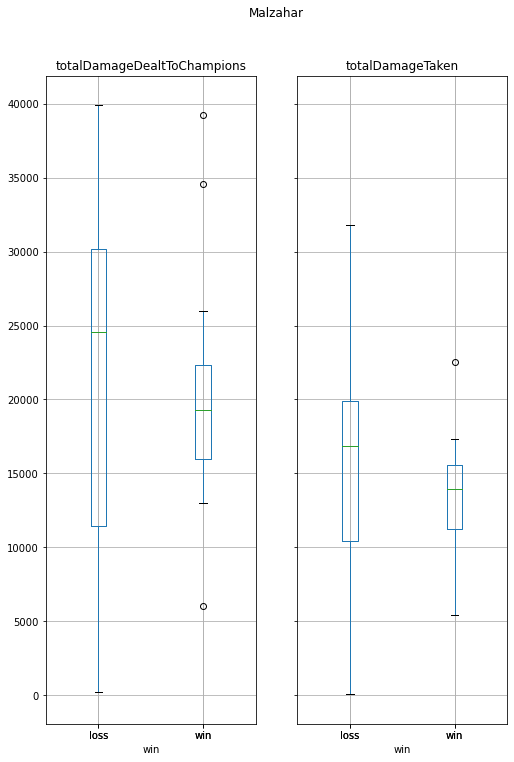

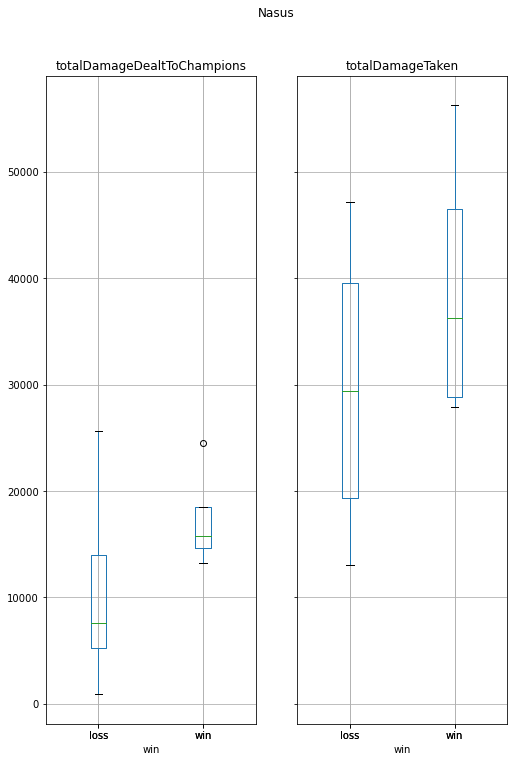

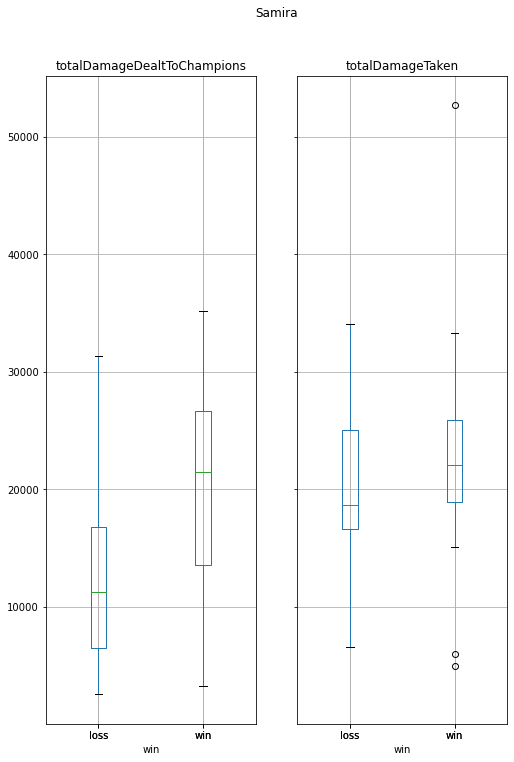

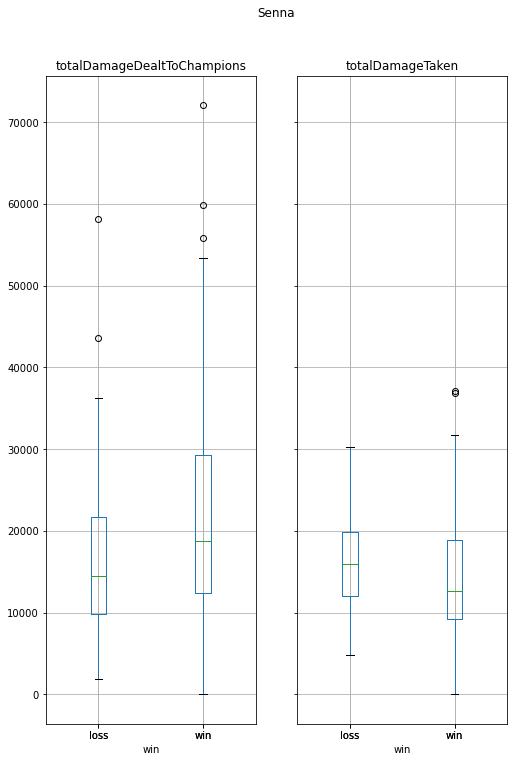

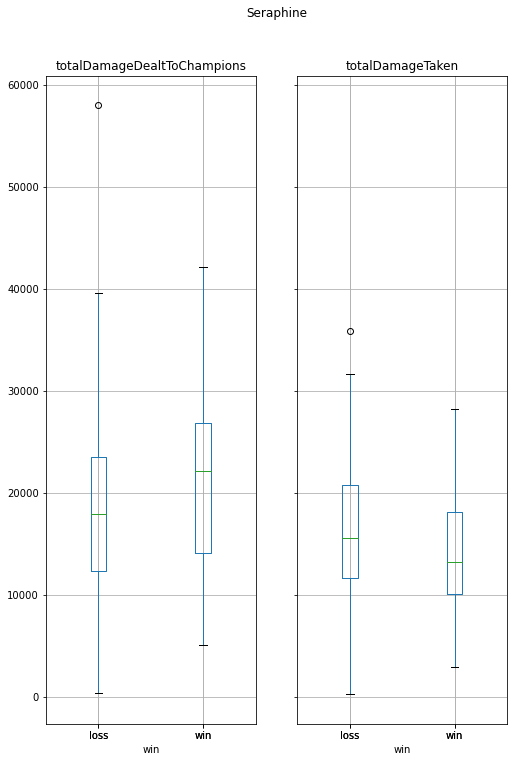

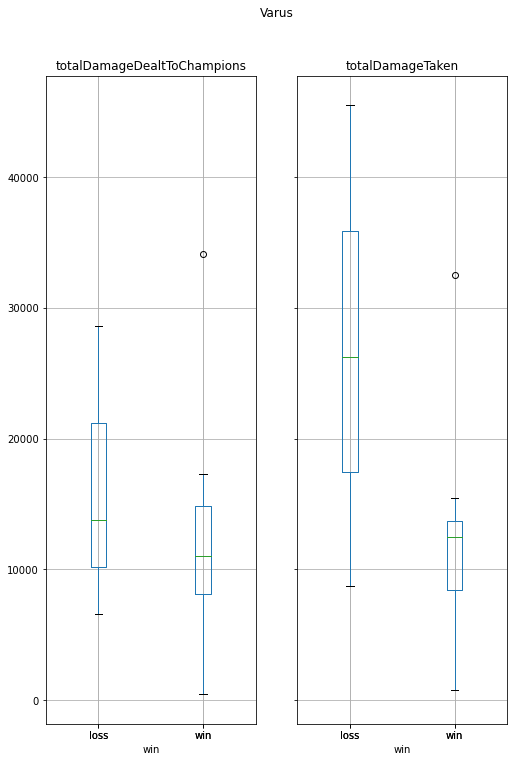

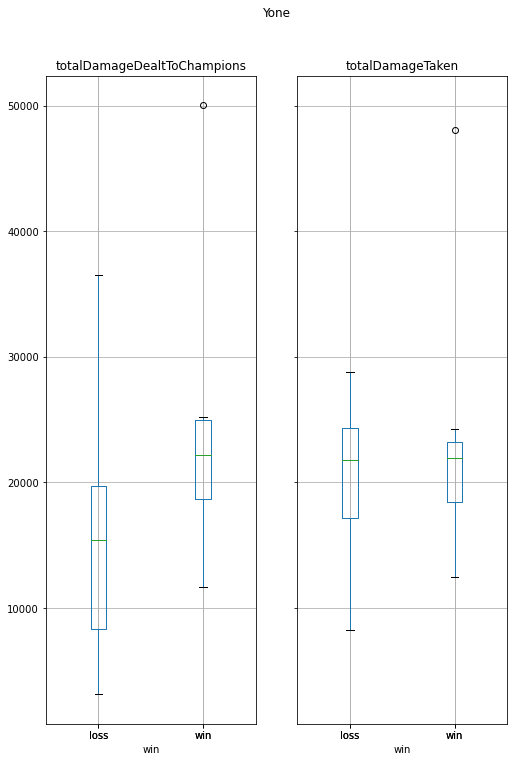

In [35]:
for namechamp in highestWinRate2['championName']:
    
    NEXTdf[NEXTdf['championName']==namechamp].boxplot(['totalDamageDealtToChampions','totalDamageTaken'], by='win', figsize=(8,12))
    plt.suptitle(namechamp)
    
;


same as above but with death and kill ratio 

''

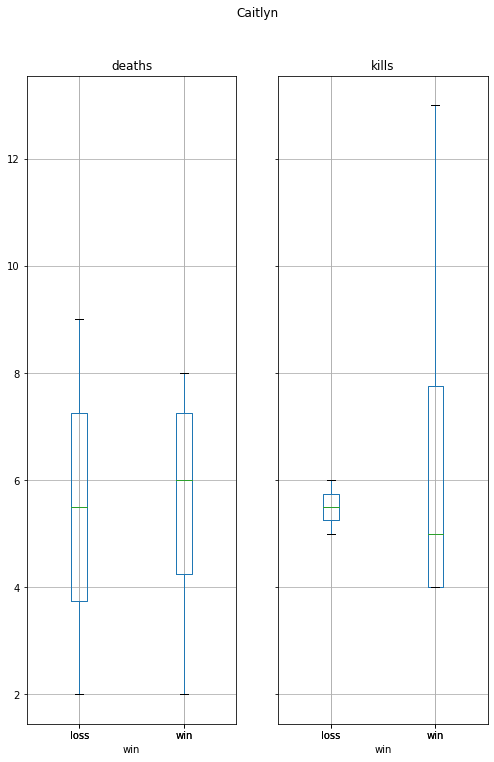

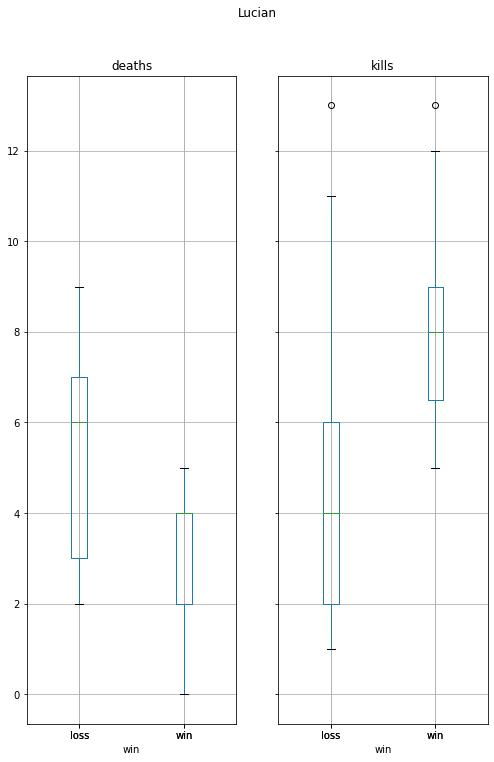

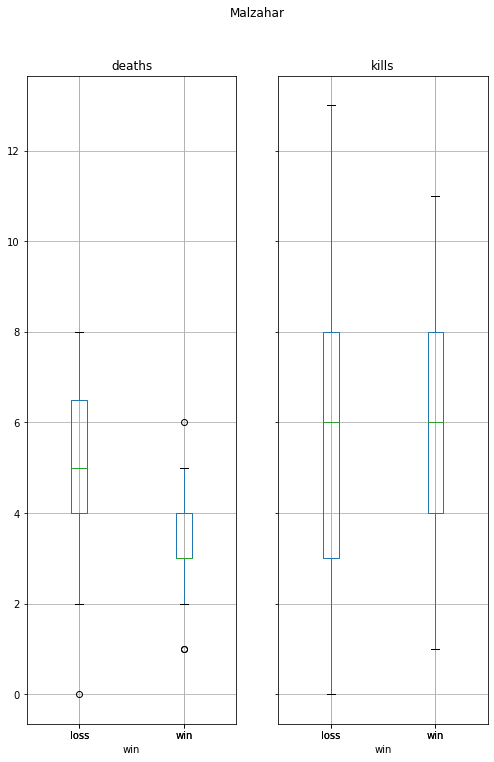

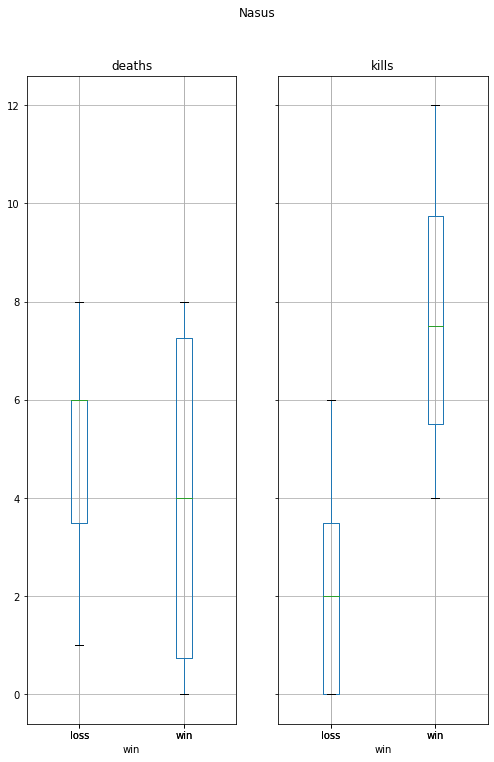

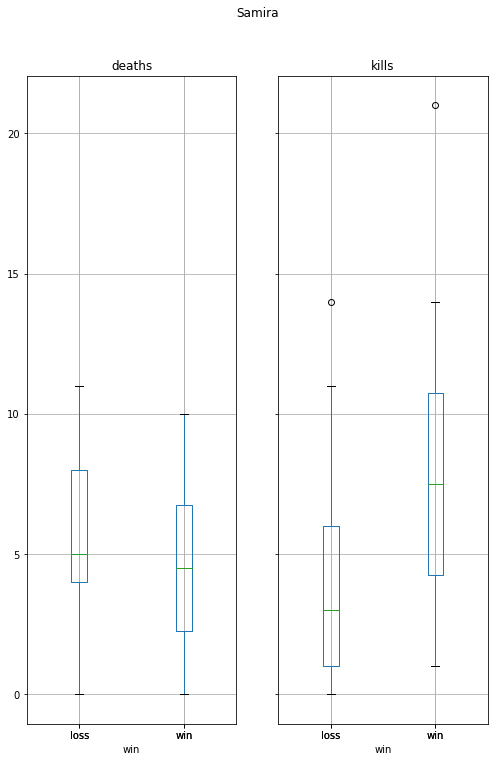

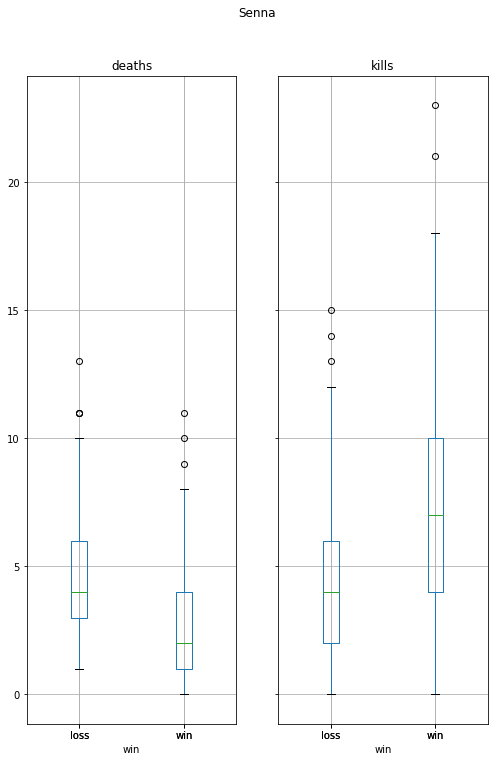

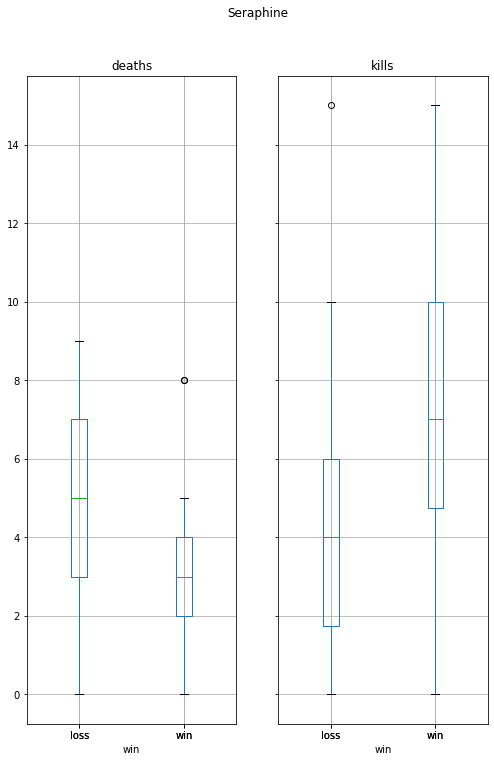

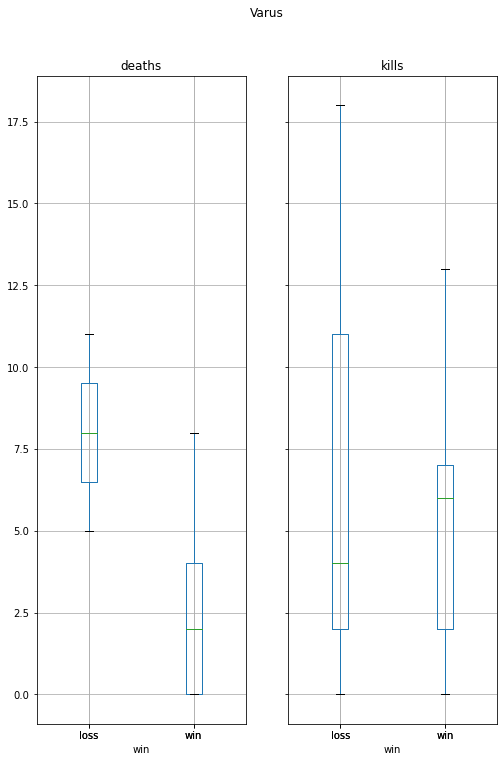

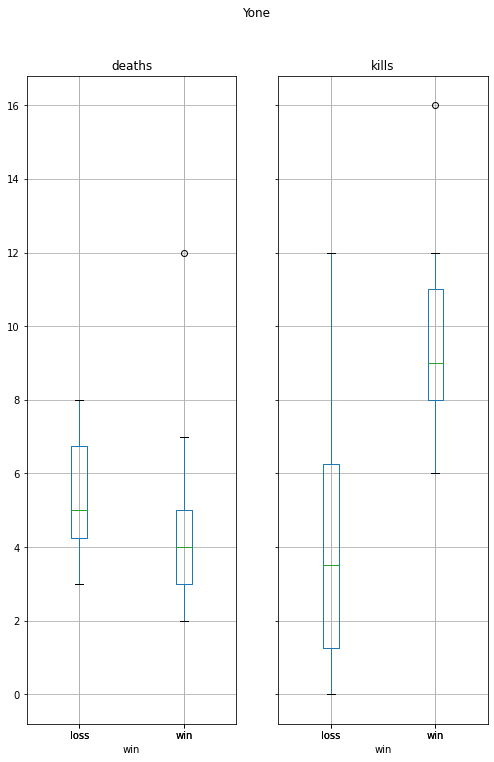

In [36]:
for namechamp in highestWinRate2['championName']:
    
    NEXTdf[NEXTdf['championName']==namechamp].boxplot(['deaths','kills'], by='win', figsize=(8,12))
    plt.suptitle(namechamp)
    
;

I also believe that a time analysis per champion is not really available. certain champions scale as time goes on and have
peak performance for some champs are in the begining or end and they can change on how the characters are built
I would think a balanced champion would match seraphine or senna who both have equal mean game times


<ipython-input-39-153345cd8ff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEXTdf['timePlayed']=NEXTdf['timePlayed'].map(lambda x: x/60 )


(20.0, 45.0)

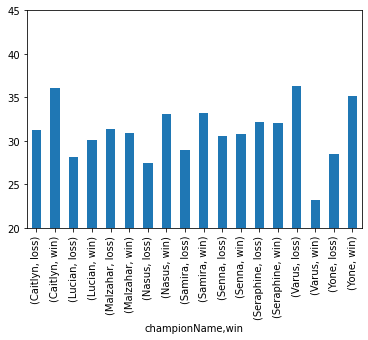

In [39]:
NEXTdf['timePlayed']=NEXTdf['timePlayed'].map(lambda x: x/60 )

NEXTdf.groupby(['championName','win']).mean()['timePlayed'].plot(kind='bar')
plt.ylim([20,45])

these next two charts are of item builds also built around
these are items  at the time of win or lose so naturally there will be a higher skew to early game items 
but we can see that 


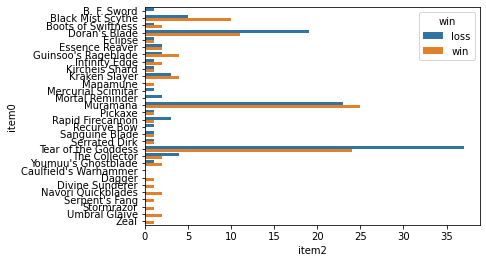

In [120]:
grouped=NEXTdf.groupby(['championName','win','item0'])['item2'].count()
t=grouped['Senna'].reset_index()
sns.barplot(data=t, y='item0',x='item2',hue='win',);

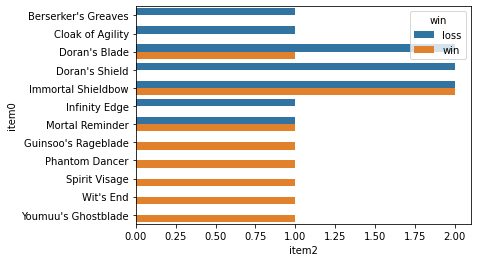

In [121]:
t=grouped['Yone'].reset_index()
sns.barplot(data=t, y='item0',x='item2',hue='win',);

In [23]:
NEXTdf.corr()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championTransform,consumablesPurchased,damageDealtToObjectives,damageDealtToTurrets,...,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,damageDealtToBuildings,inhibitorsLost,nexusLost,turretsLost
assists,1.000000,0.235929,0.184320,0.722632,0.632675,0.007419,NaN,0.285703,0.453456,0.349805,...,0.294398,NaN,0.431302,0.119744,0.236382,0.450244,0.408651,-0.044787,-0.220193,-0.040184
baronKills,0.235929,1.000000,0.128495,0.201384,0.197910,-0.054144,NaN,0.035981,0.387591,0.145997,...,0.164976,NaN,0.222760,0.133695,0.111279,0.204206,0.182985,-0.169446,-0.188443,-0.075843
bountyLevel,0.184320,0.128495,1.000000,0.157304,0.169452,0.029558,NaN,-0.012658,0.359597,0.363849,...,0.306348,NaN,0.012500,-0.076051,0.038484,0.009500,0.393959,-0.374144,-0.470222,-0.412195
champExperience,0.722632,0.201384,0.157304,1.000000,0.933255,-0.012881,NaN,0.297893,0.537783,0.399789,...,0.373064,NaN,0.459906,0.003067,0.254872,0.511924,0.436917,0.184634,0.003860,0.252858
champLevel,0.632675,0.197910,0.169452,0.933255,1.000000,-0.035362,NaN,0.248608,0.506190,0.391639,...,0.371440,NaN,0.464032,0.025634,0.240951,0.521877,0.414534,0.165900,0.061081,0.269718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wardsPlaced,0.450244,0.204206,0.009500,0.511924,0.521877,0.118584,NaN,0.406249,0.371912,0.237382,...,0.255650,NaN,0.953924,0.463132,0.496702,1.000000,0.280740,0.052809,-0.031227,0.190939
damageDealtToBuildings,0.408651,0.182985,0.393959,0.436917,0.414534,0.153629,NaN,0.180939,0.737213,1.000000,...,0.778896,NaN,0.301010,-0.019124,0.163630,0.280740,1.000000,-0.386545,-0.498998,-0.390839
inhibitorsLost,-0.044787,-0.169446,-0.374144,0.184634,0.165900,0.107024,NaN,0.127485,-0.334518,-0.386545,...,-0.340480,NaN,0.001693,0.012349,-0.038303,0.052809,-0.386545,1.000000,0.682376,0.821250
nexusLost,-0.220193,-0.188443,-0.470222,0.003860,0.061081,0.048807,NaN,-0.002719,-0.435489,-0.498998,...,-0.434985,NaN,-0.116361,-0.008844,-0.102802,-0.031227,-0.498998,0.682376,1.000000,0.803552


In [41]:
trimNEXTdf=NEXTdf.drop(['sightWardsBoughtInGame','nexusLost','turretsLost','inhibitorsLost', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'turretKills', 'unrealKills', 'tripleKills', 'totalDamageShieldedOnTeammates', 'teamId', 'teamPosition', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'riotIdName', 'riotIdTagline', 'role', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'neutralMinionsKilled', 'nexusKills', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken','item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'damageSelfMitigated', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased'], axis=1)

this this is a looking at correlation matrix   

In [42]:
trimNEXTdf["win"]=trimNEXTdf['win'].map(lambda x: 1 if x=='win' else 0)

trimNEXTdf.corr()

,assists,baronKills,bountyLevel,champExperience,damageDealtToObjectives,damageDealtToTurrets,deaths,detectorWardsPlaced,doubleKills,dragonKills,...,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,visionScore,win,damageDealtToBuildings
assists,1.000000,0.235929,0.184320,0.722632,0.453456,0.349805,0.239422,0.135165,0.239568,0.117386,...,0.248034,0.372157,0.346704,0.362555,0.171304,0.401404,0.273356,0.431302,0.357366,0.408651
baronKills,0.235929,1.000000,0.128495,0.201384,0.387591,0.145997,0.003117,0.149135,0.204882,0.128467,...,0.023580,0.199903,0.066614,0.081567,0.065984,0.118504,0.218634,0.222760,0.201032,0.182985
bountyLevel,0.184320,0.128495,1.000000,0.157304,0.359597,0.363849,-0.366728,-0.060696,0.340029,0.213872,...,0.104257,0.037521,-0.298387,0.120250,0.058376,0.159902,-0.032999,0.012500,0.538958,0.393959
champExperience,0.722632,0.201384,0.157304,1.000000,0.537783,0.399789,0.368830,0.010442,0.426685,0.194296,...,0.693711,0.405773,0.551113,0.227766,0.376305,0.546513,0.425708,0.459906,0.198270,0.436917
damageDealtToObjectives,0.453456,0.387591,0.359597,0.537783,1.000000,0.696531,0.013110,0.019556,0.468933,0.374119,...,0.371728,0.173601,0.183270,0.059504,0.313692,0.403214,0.241651,0.354856,0.531655,0.737213
damageDealtToTurrets,0.349805,0.145997,0.363849,0.399789,0.696531,1.000000,-0.111704,0.015898,0.384218,0.148200,...,0.325525,0.017732,0.030201,0.094943,0.151750,0.264082,0.066270,0.234861,0.618839,1.000000
deaths,0.239422,0.003117,-0.366728,0.368830,0.013110,-0.111704,1.000000,0.106814,0.113109,0.060493,...,0.113498,0.203622,0.904988,-0.048167,0.159568,0.229450,0.460214,0.287775,-0.360592,-0.073345
detectorWardsPlaced,0.135165,0.149135,-0.060696,0.010442,0.019556,0.015898,0.106814,1.000000,0.071221,0.018932,...,-0.245172,0.067150,0.064277,0.103485,-0.150787,-0.036923,0.031850,0.564762,0.047856,0.000734
doubleKills,0.239568,0.204882,0.340029,0.426685,0.468933,0.384218,0.113109,0.071221,1.000000,0.211959,...,0.332508,0.194921,0.245913,-0.008839,0.132227,0.338719,0.232048,0.237763,0.277069,0.447412
dragonKills,0.117386,0.128467,0.213872,0.194296,0.374119,0.148200,0.060493,0.018932,0.211959,1.000000,...,0.089527,0.165418,0.117381,-0.057732,0.133595,0.123525,0.162142,0.146685,0.158627,0.138244
